Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 2.94E+00
	diameter = 1.0E-01, distance = 3.20E-01
	diameter = 1.0E-02, distance = 3.20E-02
	diameter = 1.0E-03, distance = 4.00E-03
	diameter = 1.0E-04, distance = 1.14E-03
Done!


Convergence Order:0.8721250374437314 prefactor K:2.3557730677447988


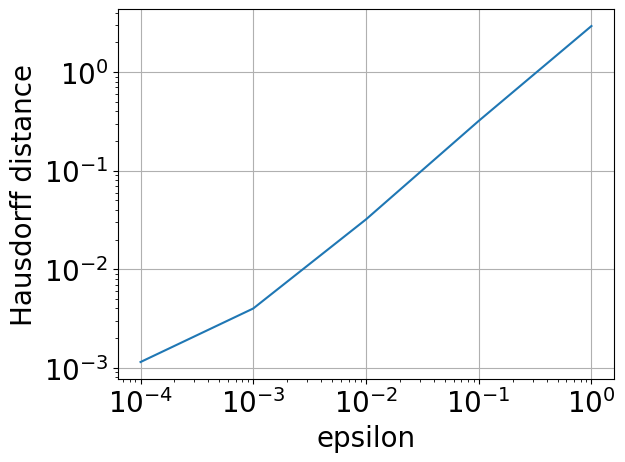

Process executed


In [1]:
from graphing.helper import convergence_analysis
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from NSPLIB.src.instances.process.process_SP import const_model
process_obj = -1126.4218270121305
process_sol = {"x1":1727.2601809997955,"x2":16000,"x3":104.23841082714829,"x5":2000}
process_y_bound = {"x1":[10,2000],"x2":[0,16000],"x3":[0,120],"x5":[0,2000]}
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="baron")
convergence_analysis(alg,process_sol,process_obj,start=-4,stop=0,steps=5,name="Process")
print("Process executed")